In [13]:
# Import libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('diabetes.csv')

# Basic inspection
print(f"Shape: {df.shape}")
df.head()


Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Missing values before:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_9132\4170740468.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_before.index, y=missing_before.values, palette='Reds_r')


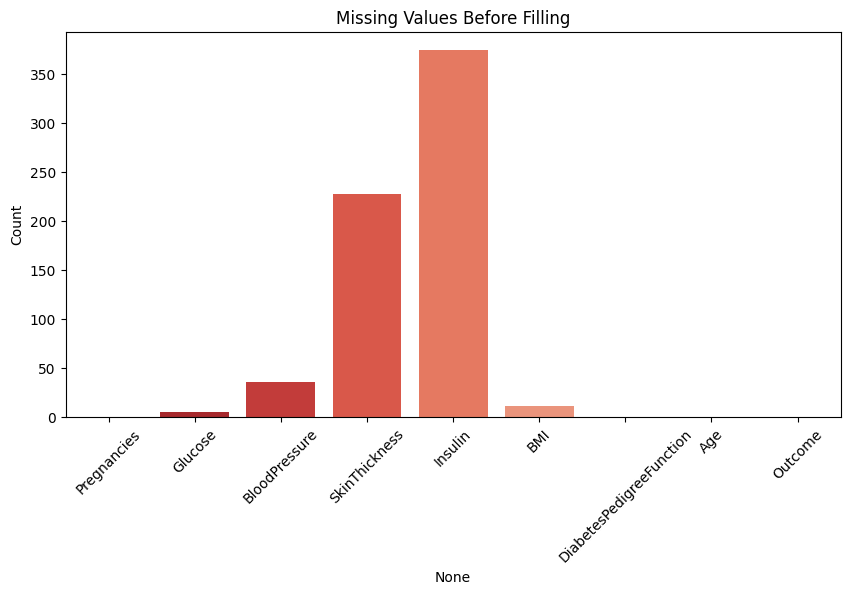


Missing values after:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_9132\4170740468.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_after.index, y=missing_after.values, palette='Greens')


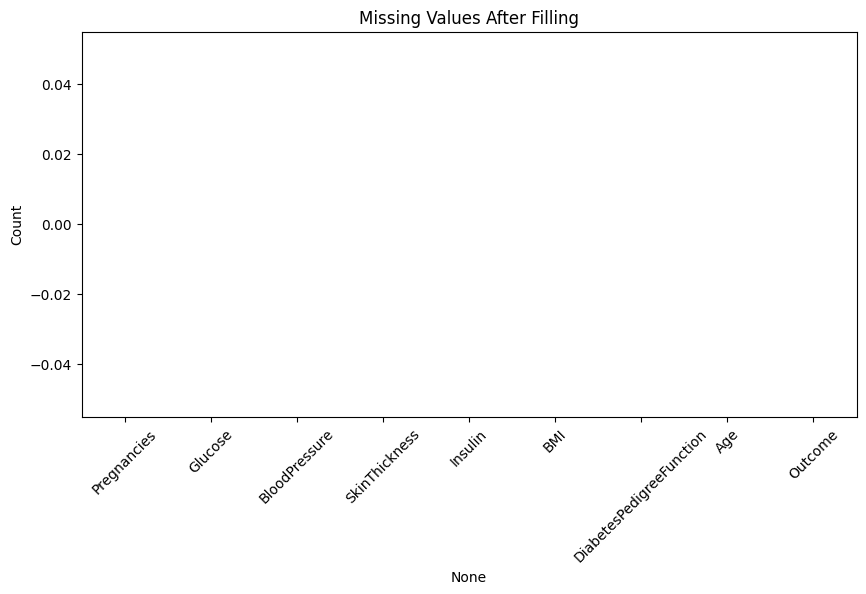

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 0s with NaN in relevant columns
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_cols] = df[zero_cols].replace(0, np.nan)

# Count missing values before filling
missing_before = df.isnull().sum()

# Show counts as text
print("Missing values before:\n", missing_before)

# Visualize missing values before
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_before.index, y=missing_before.values, palette='Reds_r')
plt.title("Missing Values Before Filling")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Fill missing values with median
df.fillna(df.median(), inplace=True)

# Count missing values after filling
missing_after = df.isnull().sum()

# Show counts as text
print("\nMissing values after:\n", missing_after)

# Visualize missing values after
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_after.index, y=missing_after.values, palette='Greens')
plt.title("Missing Values After Filling")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


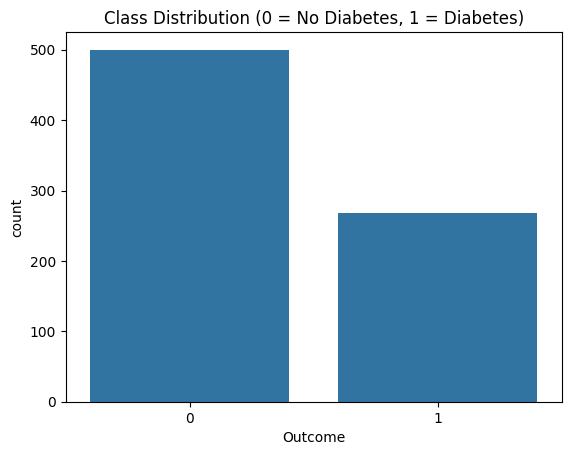

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show class distribution
sns.countplot(x='Outcome', data=df)
plt.title("Class Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()

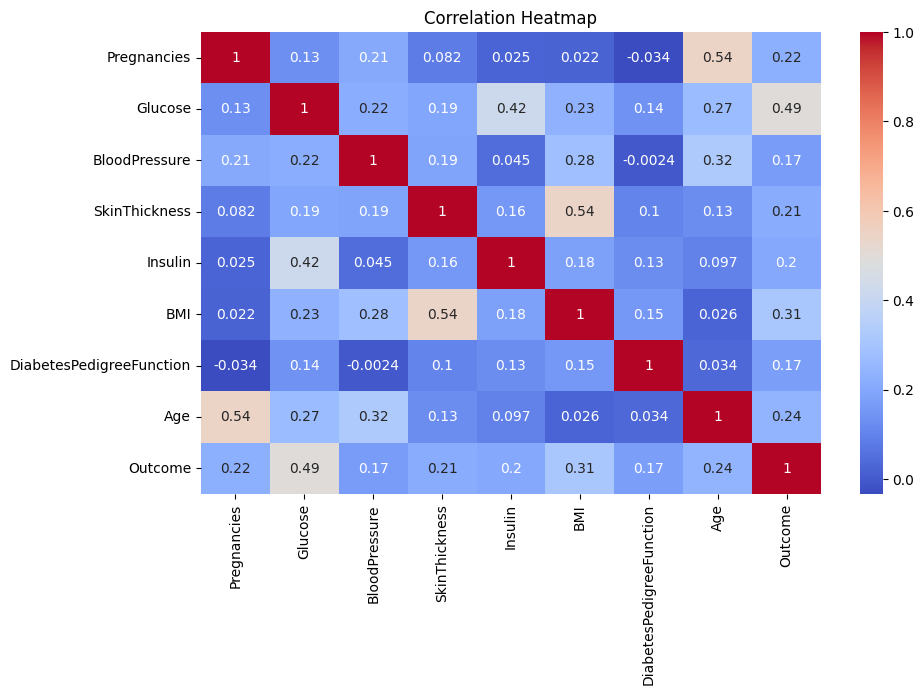

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


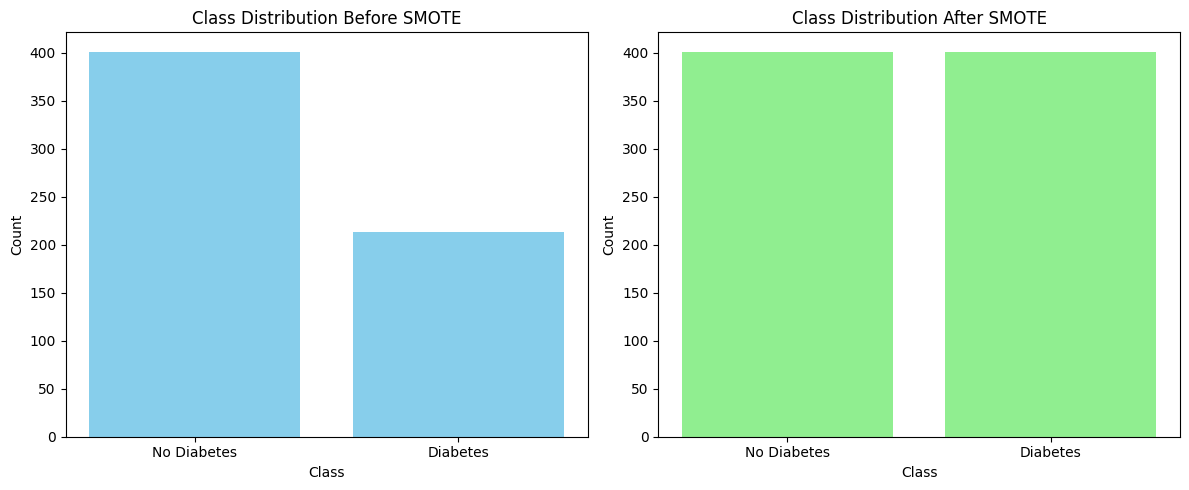

In [18]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

# Original class distribution
original_counts = Counter(y_train)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Balanced class distribution
balanced_counts = Counter(y_train_bal)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
axs[0].bar(original_counts.keys(), original_counts.values(), color='skyblue')
axs[0].set_title("Class Distribution Before SMOTE")
axs[0].set_xlabel("Class")
axs[0].set_ylabel("Count")
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['No Diabetes', 'Diabetes'])

# After SMOTE
axs[1].bar(balanced_counts.keys(), balanced_counts.values(), color='lightgreen')
axs[1].set_title("Class Distribution After SMOTE")
axs[1].set_xlabel("Class")
axs[1].set_ylabel("Count")
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()


C:\Users\User\anaconda3\envs\diabetes-ml\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
=== Neural Network ===
Training Accuracy: 0.87656
Test Accuracy: 0.73377
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78        99
           1       0.61      0.73      0.66        55

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



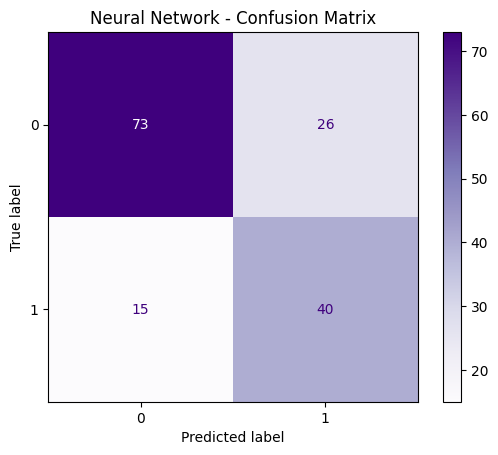

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set random seed for reproducibility
tf.random.set_seed(42)

# Build and compile model
model = Sequential([
    Dense(12, activation='relu', input_dim=X_train.shape[1]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train_bal, y_train_bal, epochs=100, batch_size=10, verbose=0)

# Evaluate
accuracy_nn_train = model.evaluate(X_train_bal, y_train_bal, verbose=0)[1]
accuracy_nn_test = model.evaluate(X_test, y_test, verbose=0)[1]
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

# Print NN results
print("=== Neural Network ===")
print(f"Training Accuracy: {accuracy_nn_train:.5f}")
print(f"Test Accuracy: {accuracy_nn_test:.5f}")
print("Classification Report:\n", classification_report(y_test, y_pred_nn))

# Confusion Matrix - NN
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nn, cmap='Purples')
plt.title('Neural Network - Confusion Matrix')
plt.show()


=== Logistic Regression ===
Train Accuracy: 0.75810
Test Accuracy: 0.70779
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.57      0.71      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



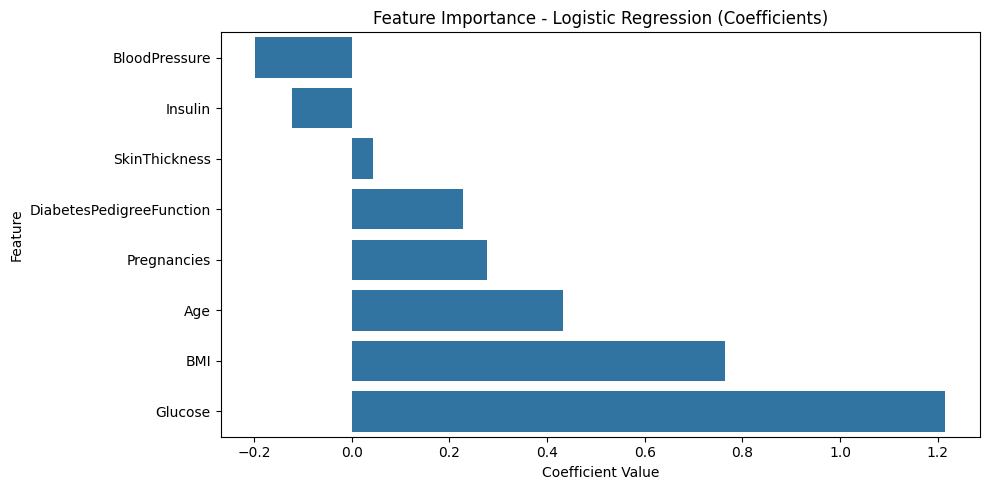

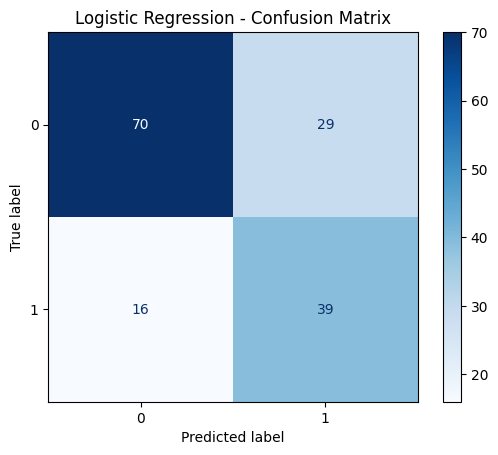

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === Train Logistic Regression ===
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predictions
y_train_pred_lr = lr.predict(X_train_bal)
y_test_pred_lr = lr.predict(X_test)

# Accuracy
train_acc_lr = accuracy_score(y_train_bal, y_train_pred_lr)
test_acc_lr = accuracy_score(y_test, y_test_pred_lr)

# Print results
print("=== Logistic Regression ===")
print(f"Train Accuracy: {train_acc_lr:.5f}")
print(f"Test Accuracy: {test_acc_lr:.5f}")
print("Classification Report:\n", classification_report(y_test, y_test_pred_lr))

# === Feature Importance (using coefficients) ===
feature_importance_lr = pd.Series(
    lr.coef_[0], index=df.columns[:-1]  # Adjust index if needed
).sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_lr.values, y=feature_importance_lr.index)
plt.title("Feature Importance - Logistic Regression (Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# === Confusion Matrix ===
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


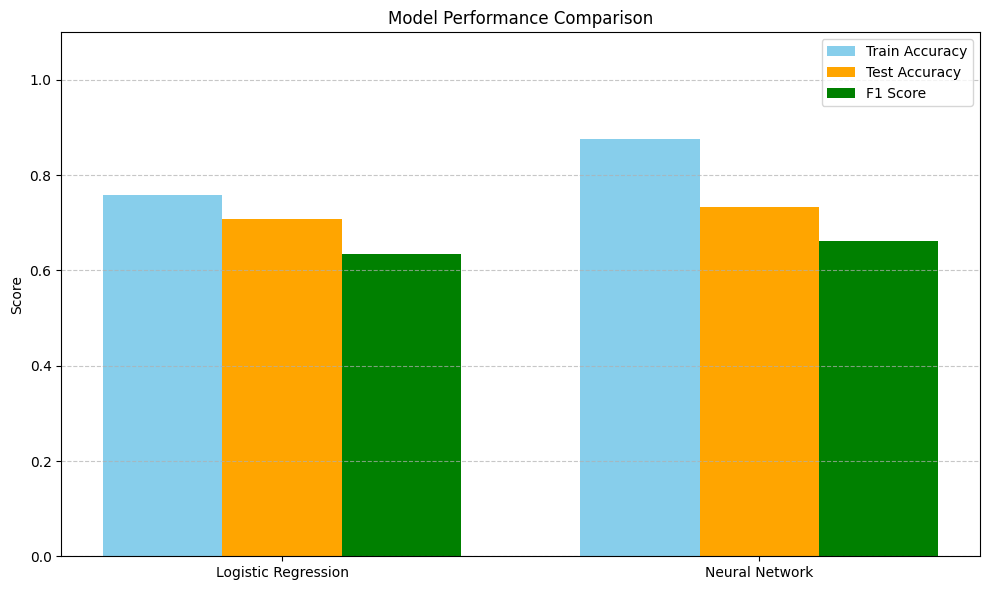


=== Summary Metrics ===
                 Model  Train Accuracy  Test Accuracy  Precision   Recall  \
0  Logistic Regression         0.75810        0.70779    0.57353  0.70909   
1       Neural Network         0.87656        0.73377    0.60606  0.72727   

   F1 Score  AUC Score  
0   0.63415    0.82534  
1   0.66116    0.79339  


In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, ConfusionMatrixDisplay
)

# AUC Scores
auc_lr = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
auc_nn = roc_auc_score(y_test, model.predict(X_test).ravel())

# === Comparison Visualization ===
models = ['Logistic Regression', 'Neural Network']
train_accuracies = [train_acc_lr, accuracy_nn_train]
test_accuracies = [test_acc_lr, accuracy_nn_test]
precisions = [precision_score(y_test, y_test_pred_lr), precision_score(y_test, y_pred_nn)]
recalls = [recall_score(y_test, y_test_pred_lr), recall_score(y_test, y_pred_nn)]
f1s = [f1_score(y_test, y_test_pred_lr), f1_score(y_test, y_pred_nn)]

# Bar chart for accuracy comparison
x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, train_accuracies, width, label='Train Accuracy', color='skyblue')
plt.bar(x, test_accuracies, width, label='Test Accuracy', color='orange')
plt.bar(x + width, f1s, width, label='F1 Score', color='green')

plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Neural Network'],
    'Train Accuracy': [train_acc_lr, accuracy_nn_train],
    'Test Accuracy': [test_acc_lr, accuracy_nn_test],
    'Precision': [precision_score(y_test, y_test_pred_lr), precision_score(y_test, y_pred_nn)],
    'Recall': [recall_score(y_test, y_test_pred_lr), recall_score(y_test, y_pred_nn)],
    'F1 Score': [f1_score(y_test, y_test_pred_lr), f1_score(y_test, y_pred_nn)],
    'AUC Score': [auc_lr, auc_nn]
})

print("\n=== Summary Metrics ===")
print(metrics_df.round(5))
